In [1]:
import numpy as np  # 导入NumPy数学工具箱
import pandas as pd  # 导入Pandas数据处理工具箱
import matplotlib.pyplot as plt  # 导入matplotlib画图工具箱
import seaborn as sns  # 导入seaborn画图工具箱
from sklearn.model_selection import train_test_split
import tensorflow as tf
import sklearn.preprocessing as preprocessing
from sklearn.compose import ColumnTransformer

2024-02-28 07:50:47.058642: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-28 07:50:47.058742: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-28 07:50:47.190315: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
full_data = pd.read_csv("/kaggle/input/titanic-prepare/prepare_data.csv")

In [3]:
full_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,familyNum,familySize
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,Mr,2,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs,2,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,Miss,1,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs,2,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,Mr,1,0


In [4]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
 12  Title        1309 non-null   object 
 13  familyNum    1309 non-null   int64  
 14  familySize   1309 non-null   int64  
dtypes: float64(3), int64(6), object(6)
memory usage: 153.5+ KB


In [5]:
data = full_data.copy()

In [6]:
data = data.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'familyNum'], axis=1)

In [7]:
data.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,familySize
0,0.0,3,male,22.0,7.2500,U,S,Mr,1
1,1.0,1,female,38.0,71.2833,C,C,Mrs,1
2,1.0,3,female,26.0,7.9250,U,S,Miss,0
3,1.0,1,female,35.0,53.1000,C,S,Mrs,1
4,0.0,3,male,35.0,8.0500,U,S,Mr,0


In [8]:
# 划分训练集和测试集
train_new_data = data.iloc[:891, :]
test_new_data = data.iloc[891:, :]
train_data = train_new_data.drop(['Survived'], axis=1)
train_label = train_new_data['Survived']
x_test = test_new_data.drop(['Survived'], axis=1)

In [9]:
x_train, x_val, y_train, y_val = train_test_split(train_data, train_label, test_size=0.2, random_state=0, stratify=train_label)

In [10]:
# 创建OrdinalEncoder实例
encoder = preprocessing.OrdinalEncoder()
# 创建StandardScaler实例
scaler = preprocessing.StandardScaler()
# 定义需要进行编码的列
columns_to_encode = ['Sex', 'Embarked', 'Cabin', 'Title']

In [11]:
# 创建ColumnTransformer实例，用于对指定列进行转换
column_transformer = ColumnTransformer(
    transformers=[
        ('encoder', encoder, columns_to_encode)
    ],
    remainder='passthrough'  # 保留未指定的列
)

In [12]:
x_train = column_transformer.fit_transform(x_train)
x_val = column_transformer.transform(x_val)
x_test = column_transformer.transform(x_test)

In [13]:
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

In [14]:
x_train.shape

(712, 8)

In [15]:
x_val.shape

(179, 8)

In [16]:
x_test.shape

(418, 8)

In [17]:
# 构建模型
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=12, activation='relu'),  # 输入层
    tf.keras.layers.Dense(units=24, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=48, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=96, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=192, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=1, activation='sigmoid')  # 输出层，二分类
])

In [18]:
# 编译模型
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
history = model.fit(x_train, y_train, # 指定训练集
                  epochs=30,        # 指定训练的轮次
                  batch_size=32,    # 指定数据批量
                  validation_data=(x_val, y_val))

Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/backend/tensorflow/nn.py:669: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


 1/23 ━━━━━━━━━━━━━━━━━━━━ 3:25 9s/step - accuracy: 0.6250 - loss: 0.6221

I0000 00:00:1709106668.527030     114 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


23/23 ━━━━━━━━━━━━━━━━━━━━ 17s 338ms/step - accuracy: 0.5754 - loss: 0.6986 - val_accuracy: 0.6145 - val_loss: 0.6425
Epoch 2/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6132 - loss: 0.6585 - val_accuracy: 0.6313 - val_loss: 0.5980
Epoch 3/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6221 - loss: 0.6226 - val_accuracy: 0.7207 - val_loss: 0.5755
Epoch 4/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6622 - loss: 0.5746 - val_accuracy: 0.7151 - val_loss: 0.5469
Epoch 5/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6920 - loss: 0.5938 - val_accuracy: 0.7430 - val_loss: 0.5451
Epoch 6/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7564 - loss: 0.5653 - val_accuracy: 0.7318 - val_loss: 0.5392
Epoch 7/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7439 - loss: 0.5691 - val_accuracy: 0.7374 - val_loss: 0.5328
Epoch 8/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7357 - loss: 0.5624 - val_accuracy: 0.7430 - val_loss: 0.5240


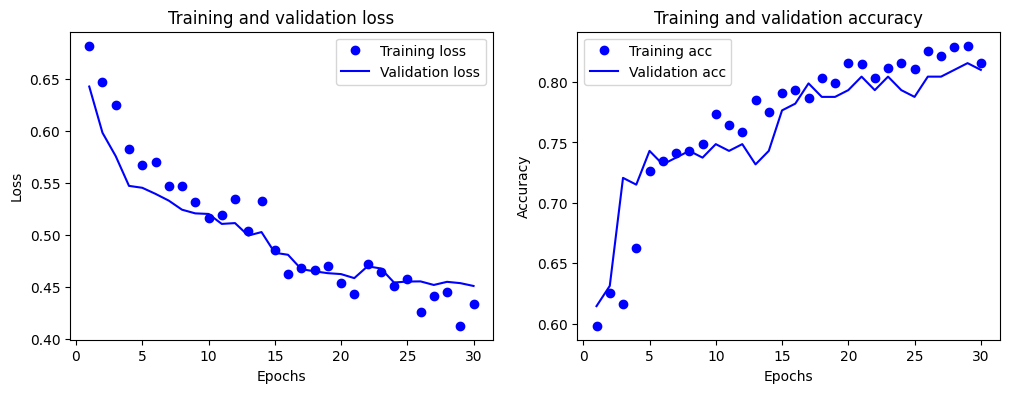

In [20]:
def show_history(history):  # 显示训练过程中的学习曲线
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    plt.subplot(1, 2, 2)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


show_history(history)

In [21]:
# 预测
y_pred = model.predict(x_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


In [22]:
y_pred

array([[0.2017849 ],
       [0.49256715],
       [0.20011857],
       [0.21655639],
       [0.41542444],
       [0.21661039],
       [0.73741305],
       [0.19669425],
       [0.757831  ],
       [0.15056896],
       [0.21657589],
       [0.32099873],
       [0.98362446],
       [0.1717876 ],
       [0.98388195],
       [0.89564085],
       [0.21714042],
       [0.22401956],
       [0.5538246 ],
       [0.6364293 ],
       [0.21182638],
       [0.42856142],
       [0.9781725 ],
       [0.29735333],
       [0.98180884],
       [0.12217822],
       [0.96519333],
       [0.22272491],
       [0.39618158],
       [0.16635239],
       [0.18303855],
       [0.20305523],
       [0.6114785 ],
       [0.58778703],
       [0.6757641 ],
       [0.22585683],
       [0.47020397],
       [0.5807671 ],
       [0.2168527 ],
       [0.2885902 ],
       [0.14527424],
       [0.42985764],
       [0.20757952],
       [0.9121555 ],
       [0.9872823 ],
       [0.21407248],
       [0.39937   ],
       [0.209

In [23]:
y_pred_int = np.where(y_pred >= 0.5, 1, 0)

In [24]:
y_pred_int = y_pred_int.reshape(418,)

In [25]:
y_pred_int

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [26]:
# from sklearn.metrics import classification_report
# print(classification_report(y_train, y_pred_int))

In [27]:
output = pd.DataFrame(
    {"PassengerId": full_data.iloc[891:, :]["PassengerId"], "Survived": y_pred_int.astype("int64")}
)

In [28]:
output.to_csv("/kaggle/working/titanic_tf_multi_adjust_submission.csv", index=False)